In [2]:
import matplotlib
import pandas as pd
import numpy as np
import xlrd
import datetime
import xlwt

def get_week(dates):
    y,m,d=dates.split('-')
    lis = ['星期一','星期二','星期三','星期四','星期五','星期六','星期日',]
    dic = dict(enumerate(lis))
    if y.isdigit() and m.isdigit() and d.isdigit() and 1<=int(m)<=12 and 1<=int(d)<=31 :
        w = datetime.date(int(y),int(m),int(d))
        # print(dic[w.weekday()])
        return dic[w.weekday()]

content_lists = []
workbook = xlrd.open_workbook(r'zoufan.xls')
sheet2 = workbook.sheet_by_name('sheet1')
rows = sheet2.nrows

for row in range(1,rows):
    current_row = sheet2.row_values(row)
    # print(current_row)
    if '分钟' in current_row[5] or '小时' in current_row[5]:
        continue
    elif '昨天' in current_row[5]:
        current_row[5] = '11-21'
    current_row[5] = '2020-' + current_row[5]
    weekdayas = get_week(current_row[5])
    current_row[5] = current_row[5] + ' ' + weekdayas

    content_lists.append(current_row)
content_lists.sort(key=lambda info:info[5])
content_lists.insert(0,sheet2.row_values(0))


workbook = xlwt.Workbook(encoding = 'utf-8')
worksheet = workbook.add_sheet('sheet1')
for i in range(len(content_lists)):
    for k in range(len(content_lists[i])):
        worksheet.write(i, k, label=content_lists[i][k])

workbook.save('new_zoufan.xls')

In [3]:
dataframe=pd.read_excel('C:\\Users\\15001\\Desktop\\新建文件夹\\new_zoufan.xls')

In [4]:
dataframe.columns

Index(['id', '用户名', '性别', '地区', '评论', '时间', '表情'], dtype='object')

In [5]:
to_drop=['id','用户名','性别','地区','评论','表情']
dataframe.drop(columns=to_drop,inplace=True)

In [6]:
dataframe.columns

Index(['时间'], dtype='object')

In [7]:
gapminder=dataframe

In [8]:
df_time=dataframe['时间'].value_counts().rename_axis('time').reset_index(name='time_counts')

In [9]:
df_time

,time,time_counts
0,2020-11-20 星期五,38
1,2020-11-05 星期四,32
2,2020-11-12 星期四,31
3,2020-11-08 星期日,30
4,2020-11-07 星期六,29
5,2020-11-11 星期三,28
6,2020-11-09 星期一,28
7,2020-11-18 星期三,26
8,2020-11-19 星期四,24
9,2020-11-04 星期三,22


In [12]:
df = df_time.sort_values(by= 'time')

In [15]:
df

,time,time_counts
17,2020-11-03 星期二,10
9,2020-11-04 星期三,22
1,2020-11-05 星期四,32
12,2020-11-06 星期五,21
4,2020-11-07 星期六,29
3,2020-11-08 星期日,30
6,2020-11-09 星期一,28
16,2020-11-10 星期二,15
5,2020-11-11 星期三,28
2,2020-11-12 星期四,31


In [16]:
gapminder_time=df

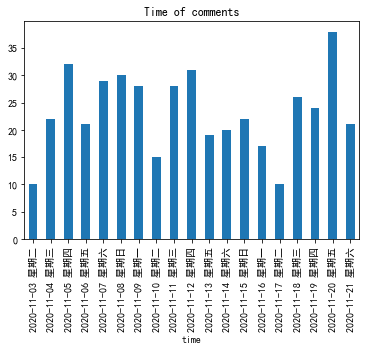

In [17]:
gapminder_time[['time',
                 'time_counts']].plot(kind='bar',
                                  x='time',
                                  y='time_counts',
                                  title='Time of comments',
                                  legend=False)
from pylab import *
mpl.rcParams['font.sans-serif']=['SimHei']
plt.show()